Default of Credit Card Clients Prediction

Introduction About the Data :

The goal is to predict that default payment of credit card will happen or not in the next month.

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

dataset link: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients


Target variable :
default payment next month: i.e default payment will happens or not (YES OR NO)


In [15]:
import pandas as pd

In [16]:
## Data Ingestions step

In [17]:
df = pd.read_csv('./data/default of credit card clients.csv', skiprows=1, header=None)

# set the first row as the header
df.columns = df.iloc[0]
df = df[1:]

# display the resulting dataframe
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
df=df.drop(labels=['ID','SEX','EDUCATION','MARRIAGE'], axis=1)

In [19]:
df.isnull().sum()

0
LIMIT_BAL                     0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [20]:
### No missing values present in the data

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   AGE                         30000 non-null  object
 2   PAY_0                       30000 non-null  object
 3   PAY_2                       30000 non-null  object
 4   PAY_3                       30000 non-null  object
 5   PAY_4                       30000 non-null  object
 6   PAY_5                       30000 non-null  object
 7   PAY_6                       30000 non-null  object
 8   BILL_AMT1                   30000 non-null  object
 9   BILL_AMT2                   30000 non-null  object
 10  BILL_AMT3                   30000 non-null  object
 11  BILL_AMT4                   30000 non-null  object
 12  BILL_AMT5                   30000 non-null  object
 13  BILL_AMT6                   30000 non-null  ob

In [22]:
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,689,0,0,0,0,1
2,120000,26,-1,2,0,0,0,2,2682,1725,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,34,0,0,0,0,0,0,29239,14027,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,37,0,0,0,0,0,0,46990,48233,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,57,-1,0,-1,0,0,0,8617,5670,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [23]:
## check for duplicated records
df.duplicated().sum()

# Extract duplicate rows
df.loc[df.duplicated(), :]

df.drop_duplicates()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,689,0,0,0,0,1
2,120000,26,-1,2,0,0,0,2,2682,1725,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,34,0,0,0,0,0,0,29239,14027,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,37,0,0,0,0,0,0,46990,48233,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,57,-1,0,-1,0,0,0,8617,5670,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,39,0,0,0,0,0,0,188948,192815,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,43,-1,-1,-1,-1,0,0,1683,1828,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,37,4,3,2,-1,0,0,3565,3356,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,41,1,-1,0,0,0,-1,-1645,78379,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [24]:
## segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)

Numerical columns: Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month'],
      dtype='object', name=0)


In [25]:
## No categorical columns

In [26]:

for i in numerical_columns:
    df[i] = df[i].astype(object).astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int32
 1   AGE                         30000 non-null  int32
 2   PAY_0                       30000 non-null  int32
 3   PAY_2                       30000 non-null  int32
 4   PAY_3                       30000 non-null  int32
 5   PAY_4                       30000 non-null  int32
 6   PAY_5                       30000 non-null  int32
 7   PAY_6                       30000 non-null  int32
 8   BILL_AMT1                   30000 non-null  int32
 9   BILL_AMT2                   30000 non-null  int32
 10  BILL_AMT3                   30000 non-null  int32
 11  BILL_AMT4                   30000 non-null  int32
 12  BILL_AMT5                   30000 non-null  int32
 13  BILL_AMT6                   30000 non-null  int32
 14  PAY_AM

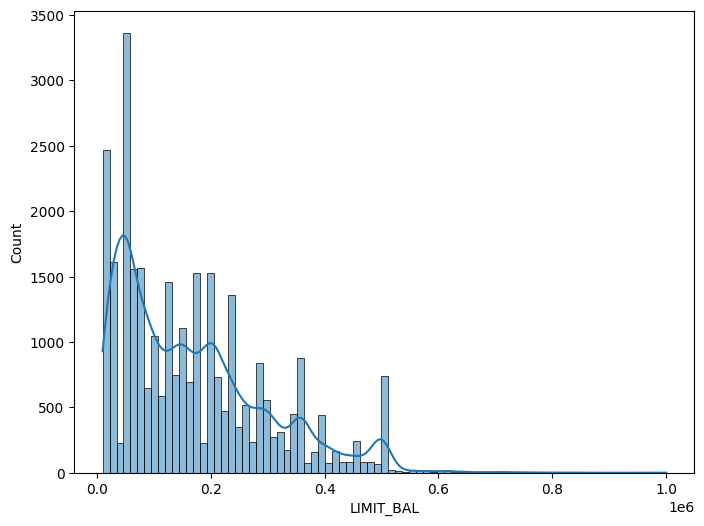

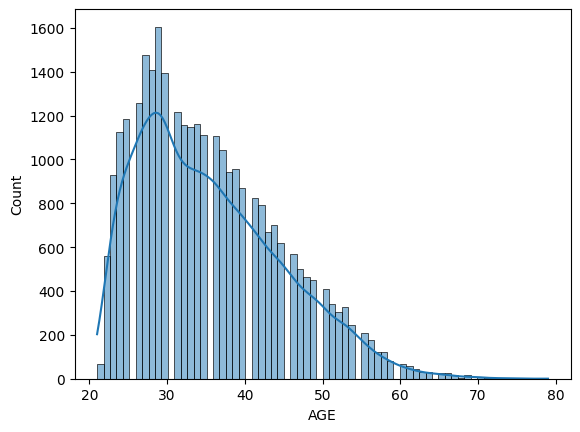

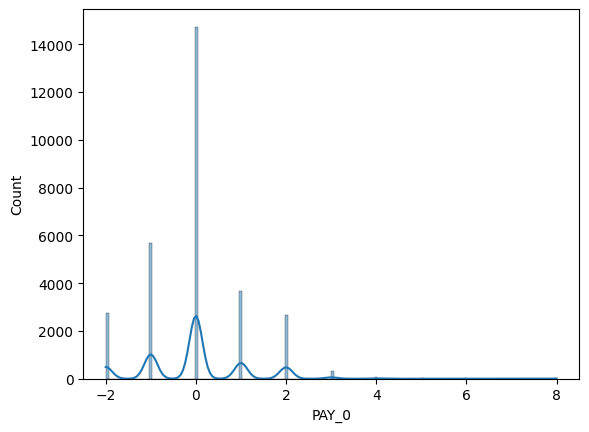

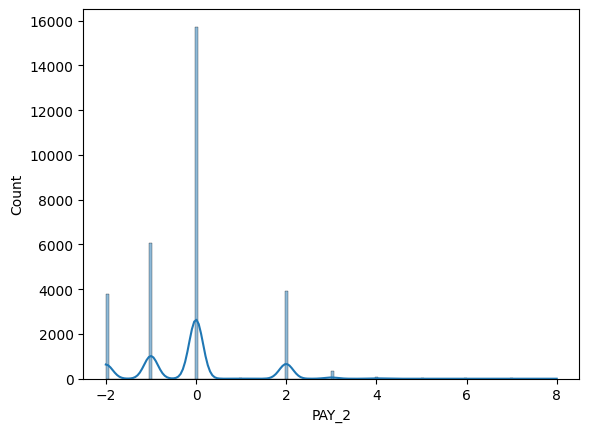

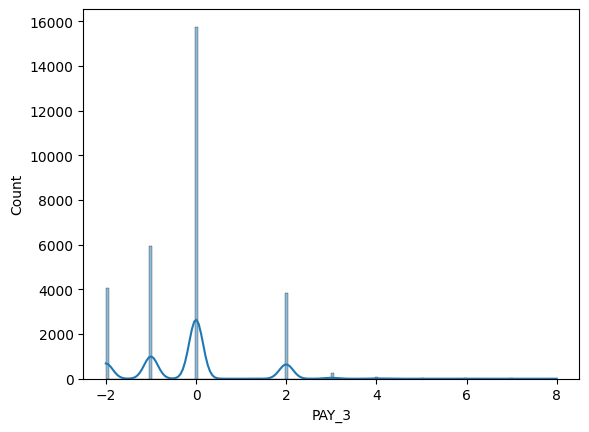

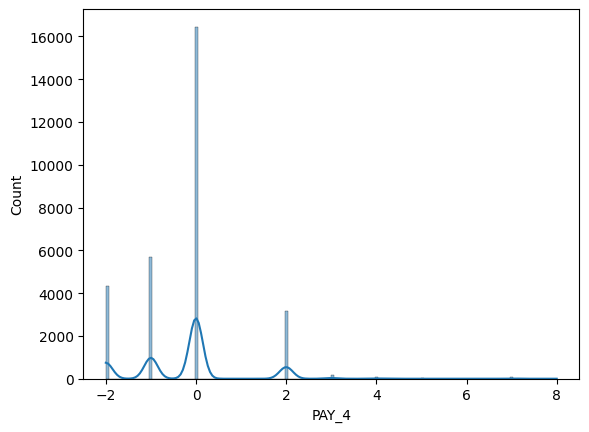

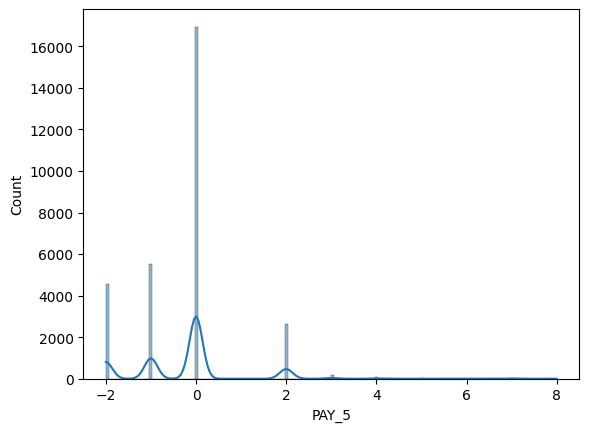

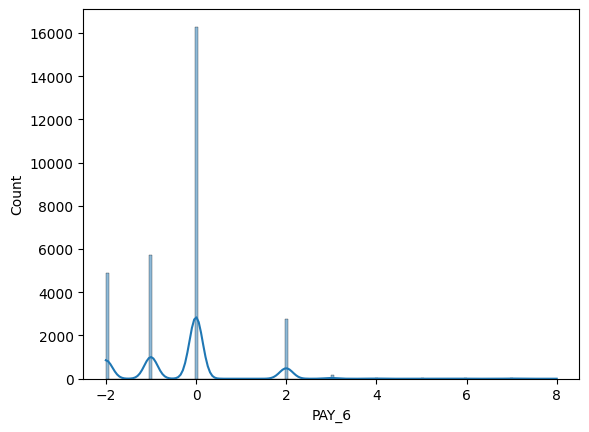

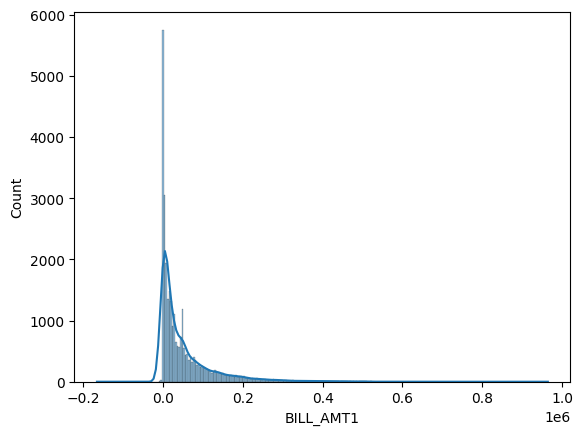

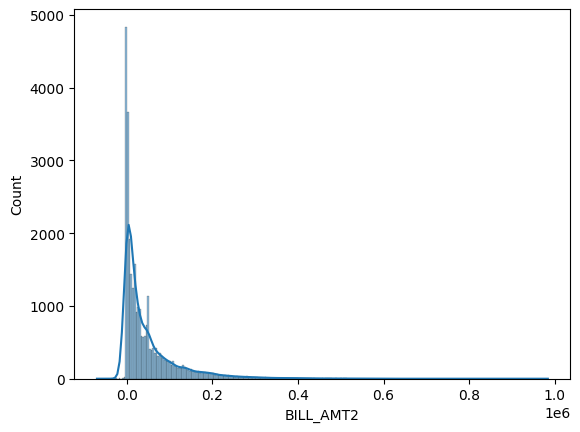

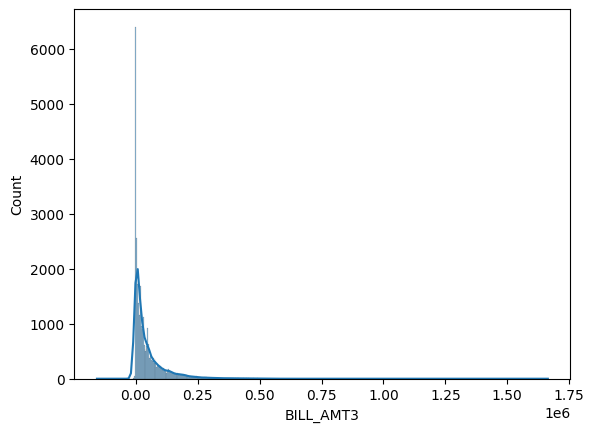

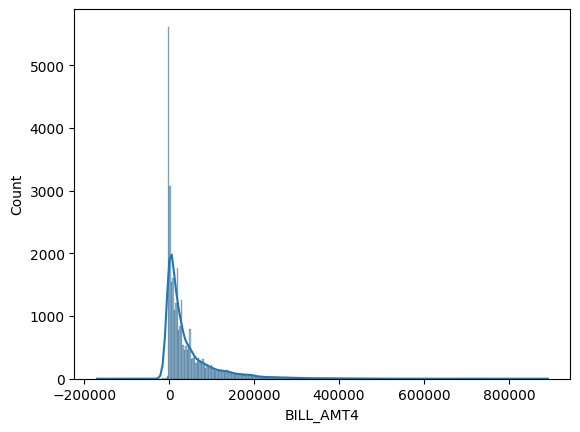

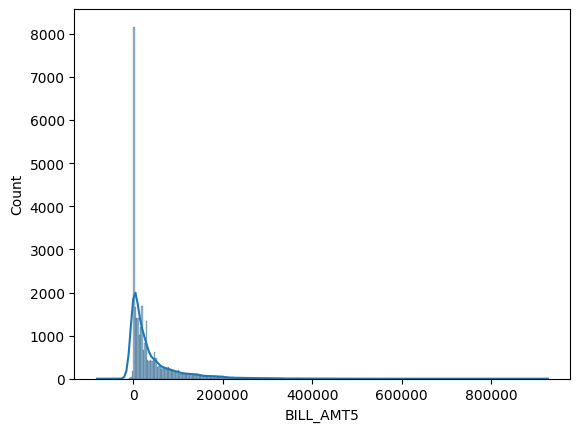

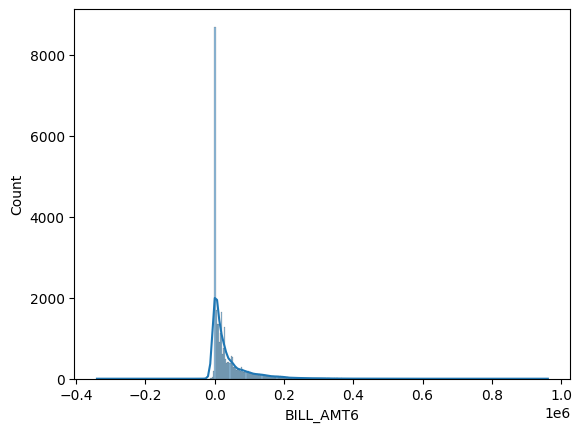

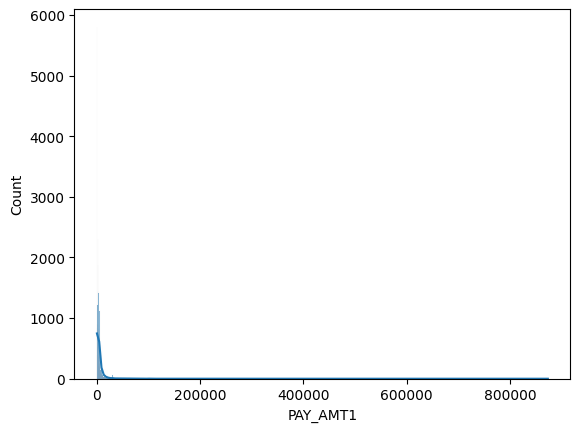

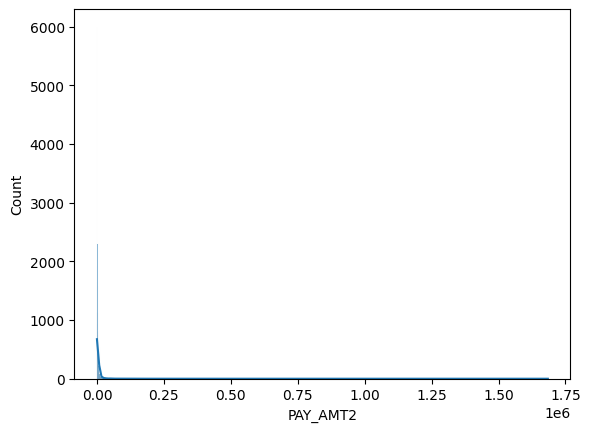

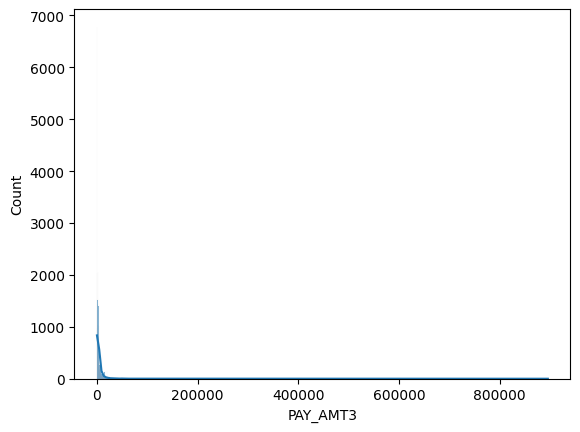

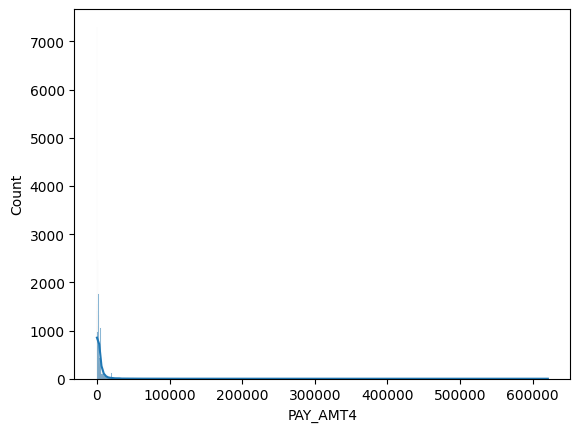

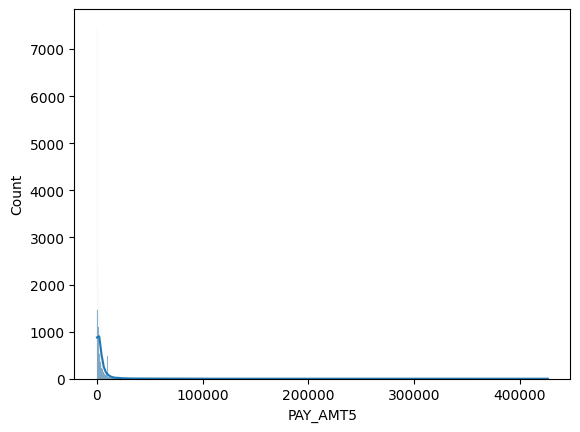

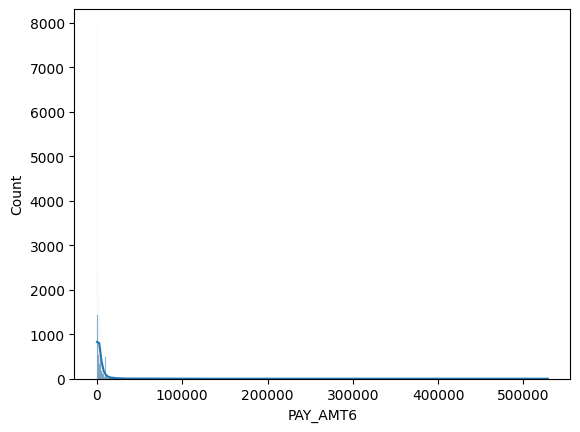

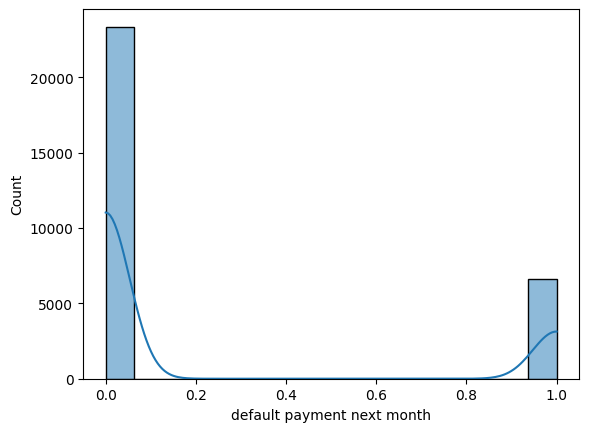

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df, x=i, kde=True)
    print('\n')
    plt.show()